# SWOT L4 Global Mosaic Visualization - June 1, 2024

This notebook visualizes the SWOT L4 gridded sea surface height product from AVISO for **June 1, 2024**.

**Product Details:**
- **Name**: Experimental Multimission Gridded L4 Sea Surface Heights with SWOT
- **Method**: MIOST (Multiscale Interpolation of Ocean Surface Topography)
- **Version**: v2.0.1
- **Resolution**: 0.125° (~14 km)
- **Coverage**: Global (89.94°S to 89.94°N)
- **Satellites**: SWOT + 7 nadir altimeters (SARAL/AltiKa, CryoSat-2, HY-2B, Jason-3, Sentinel-3A/B, Sentinel-6A)
- **Provider**: AVISO+ / CNES
- **DOI**: 10.24400/527896/a01-2025.001

**Downloaded File**: `dt_global_allsat_phy_l4_20240601_20250331.nc`  
**Date**: June 1, 2024 (2024-06-01)

In [1]:
# Import libraries
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from pathlib import Path

## 1. Load the Dataset

In [2]:
# Load the downloaded SWOT L4 product
data_file = 'swot_l4_data/dt_global_allsat_phy_l4_20240601_20250331.nc'

print(f"Loading: {data_file}")
ds = xr.open_dataset(data_file)

print("\nDataset structure:")
print(ds)

Loading: swot_l4_data/dt_global_allsat_phy_l4_20240601_20250331.nc

Dataset structure:
<xarray.Dataset> Size: 199MB
Dimensions:           (longitude: 2880, latitude: 1440, time: 1, bounds: 2)
Coordinates:
  * longitude         (longitude) float32 12kB -179.9 -179.8 ... 179.8 179.9
  * latitude          (latitude) float32 6kB -89.94 -89.81 ... 89.81 89.94
  * time              (time) datetime64[ns] 8B 2024-06-01
    longitude_bounds  (longitude, bounds) float64 46kB ...
    latitude_bounds   (latitude, bounds) float64 23kB ...
Dimensions without coordinates: bounds
Data variables:
    sla               (time, latitude, longitude) float64 33MB ...
    ugosa             (time, latitude, longitude) float64 33MB ...
    vgosa             (time, latitude, longitude) float64 33MB ...
    adt               (time, latitude, longitude) float64 33MB ...
    ugos              (time, latitude, longitude) float64 33MB ...
    vgos              (time, latitude, longitude) float64 33MB ...
Attributes:

In [3]:
# Explore available variables
print("Available Variables:")
print("="*60)
for var in ds.data_vars:
    long_name = ds[var].attrs.get('long_name', 'No description')
    units = ds[var].attrs.get('units', '')
    print(f"\n{var}:")
    print(f"  Description: {long_name}")
    if units:
        print(f"  Units: {units}")
    print(f"  Shape: {ds[var].shape}")

Available Variables:

sla:
  Description: Sea level anomaly
  Units: m
  Shape: (1, 1440, 2880)

ugosa:
  Description: Geostrophic velocity anomalies: zonal component
  Units: m/s
  Shape: (1, 1440, 2880)

vgosa:
  Description: Geostrophic velocity anomalies: meridian component
  Units: m/s
  Shape: (1, 1440, 2880)

adt:
  Description: Absolute dynamic topography
  Units: m
  Shape: (1, 1440, 2880)

ugos:
  Description: Absolute geostrophic velocity: zonal component
  Units: m/s
  Shape: (1, 1440, 2880)

vgos:
  Description: Absolute geostrophic velocity: meridian component
  Units: m/s
  Shape: (1, 1440, 2880)


In [4]:
# Verify the date in the dataset
import pandas as pd

time_value = pd.to_datetime(ds.time.values[0])
print(f"Date in file: {time_value}")
print(f"Formatted: {str(time_value)[:10]}")

Date in file: 2024-06-01 00:00:00
Formatted: 2024-06-01


## 2. Extract Data for Visualization

In [5]:
# Extract variables for June 1, 2024
sla = ds['sla'].isel(time=0)  # Sea Level Anomaly
adt = ds['adt'].isel(time=0)  # Absolute Dynamic Topography
ugos = ds['ugos'].isel(time=0)  # Zonal geostrophic velocity
vgos = ds['vgos'].isel(time=0)  # Meridional geostrophic velocity
time_str = str(ds.time.values[0])[:10]

# Calculate current speed
speed = np.sqrt(ugos**2 + vgos**2)

print(f"Data extracted for: {time_str}")


Data extracted for: 2024-06-01


## 3. Global Mosaic Visualization - Sea Level Anomaly

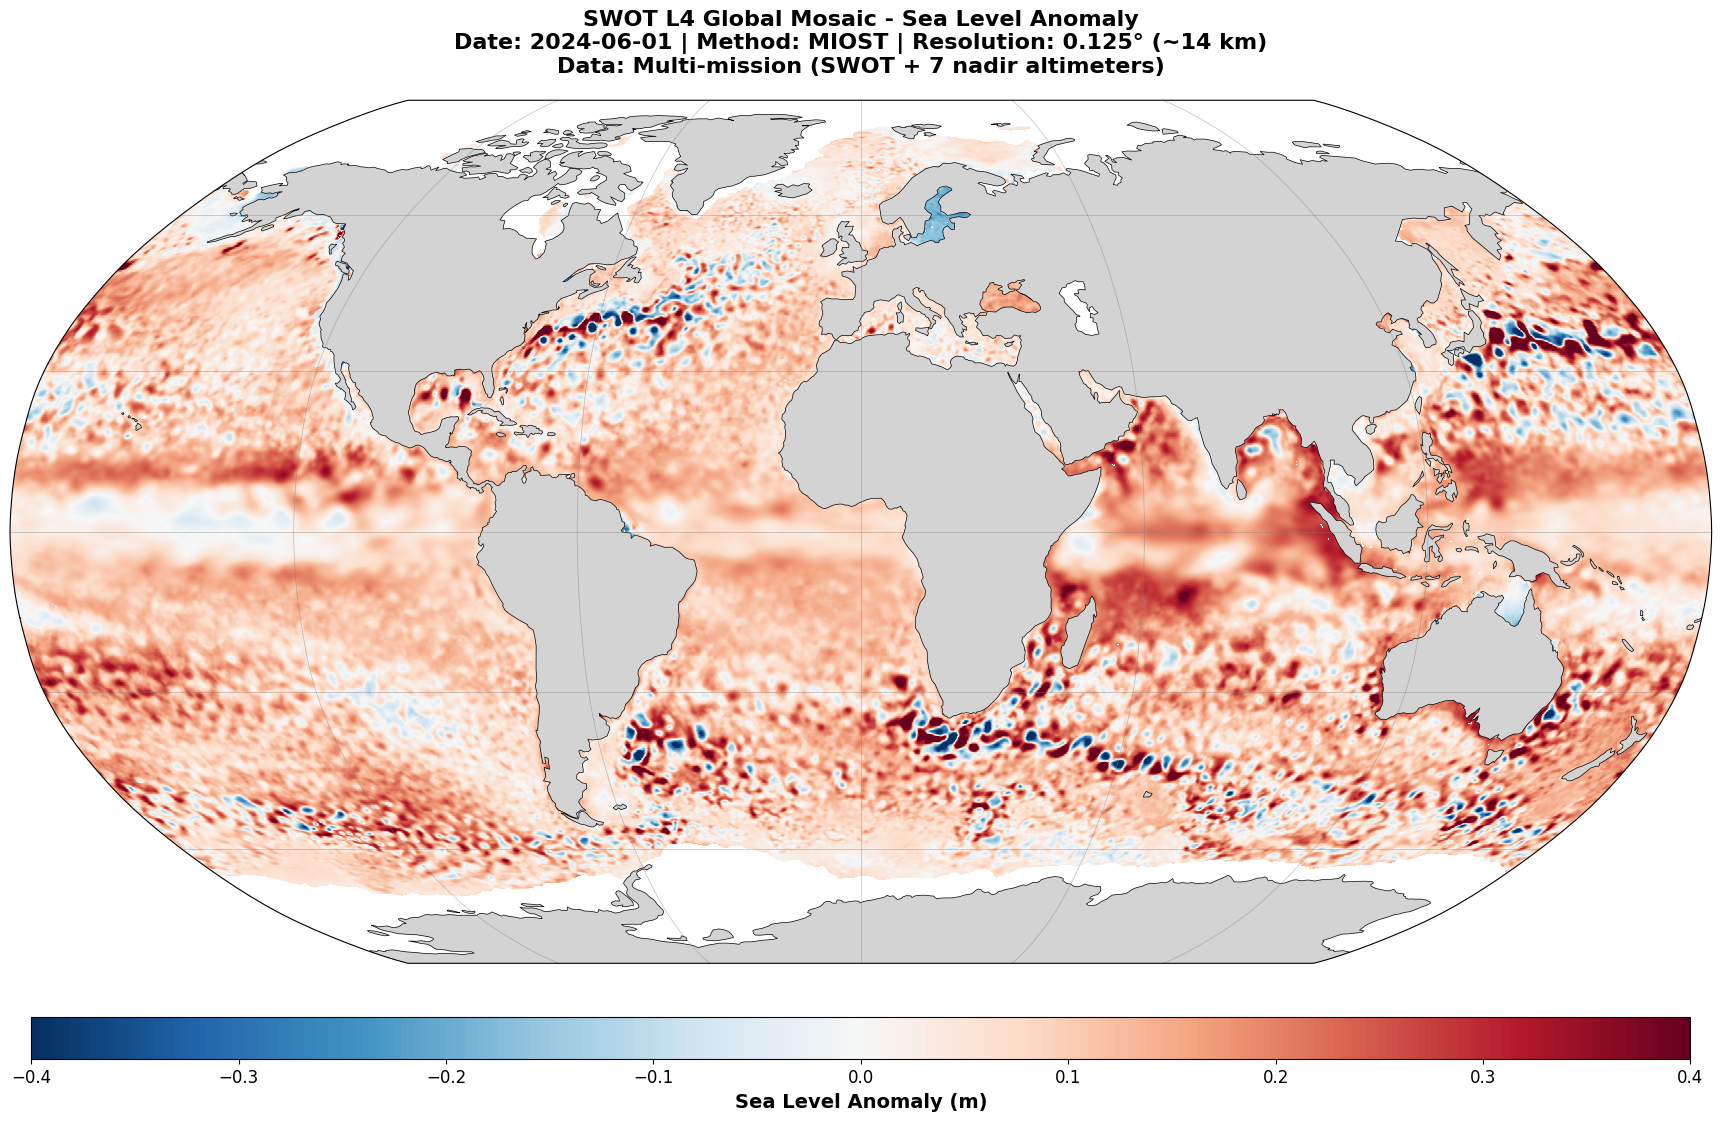

Figure saved as: swot_l4_global_mosaic_20240601.png


In [6]:
# Create global view with Robinson projection
fig = plt.figure(figsize=(24, 12))
ax = plt.subplot(1, 1, 1, projection=ccrs.Robinson())

# Plot SLA
im = sla.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap='RdBu_r',
    vmin=-0.4,
    vmax=0.4,
    add_colorbar=False,
    robust=True
)

# Add geographic features
ax.add_feature(cfeature.LAND, facecolor='lightgray', edgecolor='none', zorder=1)
ax.add_feature(cfeature.COASTLINE, linewidth=0.5, edgecolor='black', zorder=2)
ax.gridlines(draw_labels=False, linewidth=0.5, alpha=0.5, color='gray')

# Add colorbar
cbar = plt.colorbar(im, ax=ax, orientation='horizontal', 
                    pad=0.05, shrink=0.7, aspect=40)
cbar.set_label('Sea Level Anomaly (m)', fontsize=14, fontweight='bold')
cbar.ax.tick_params(labelsize=12)

# Title
title = f'SWOT L4 Global Mosaic - Sea Level Anomaly\n'
title += f'Date: {time_str} | Method: MIOST | Resolution: 0.125° (~14 km)\n'
title += f'Data: Multi-mission (SWOT + 7 nadir altimeters)'
ax.set_title(title, fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('swot_l4_global_mosaic_20240601.png', dpi=200, bbox_inches='tight', facecolor='white')
plt.show()

print("Figure saved as: swot_l4_global_mosaic_20240601.png")

## 4. Absolute Dynamic Topography and Geostrophic Current Speed

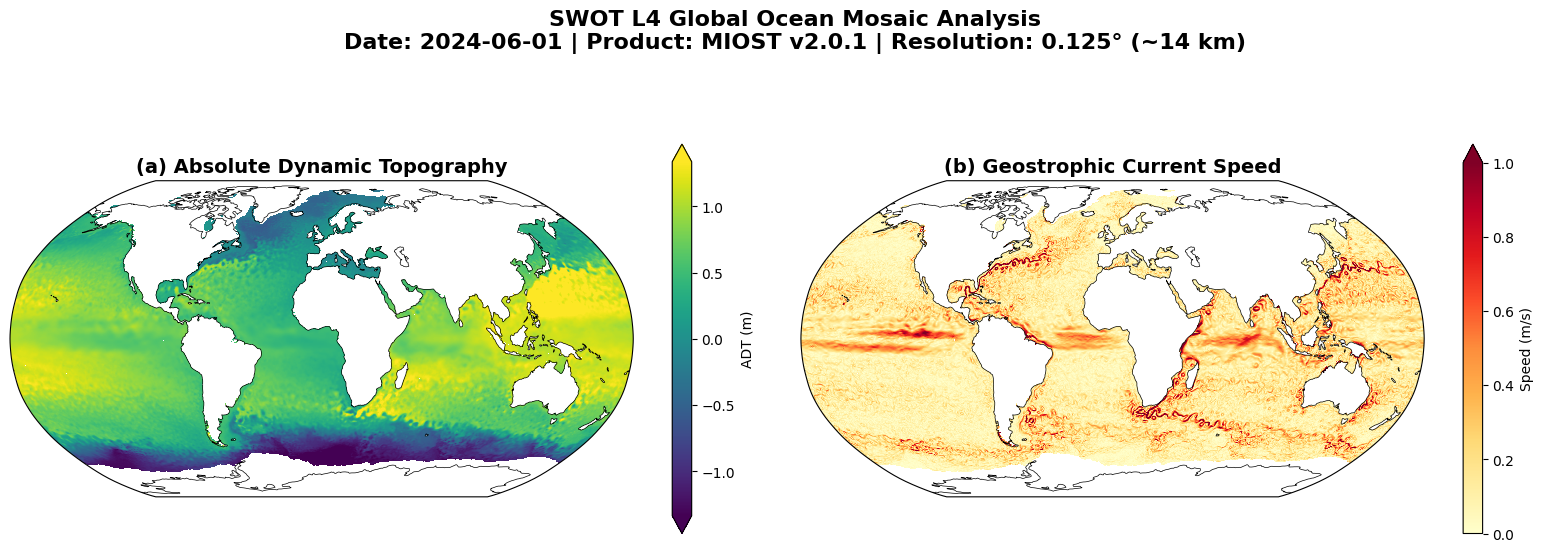

Figure saved as: swot_l4_adt_geostrophic.png


In [7]:
# Create multi-panel figure with ADT and Geostrophic Current
fig = plt.figure(figsize=(16, 6))

# 1. Absolute Dynamic Topography - Global View
ax1 = plt.subplot(1, 2, 1, projection=ccrs.Robinson())
adt.plot(ax=ax1, transform=ccrs.PlateCarree(), cmap='viridis',
         add_colorbar=True, robust=True,
         cbar_kwargs={'label': 'ADT (m)', 'shrink': 0.8})
ax1.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax1.set_title('(a) Absolute Dynamic Topography', fontsize=14, fontweight='bold')

# 2. Geostrophic Current Speed - Global View
ax2 = plt.subplot(1, 2, 2, projection=ccrs.Robinson())
speed.plot(ax=ax2, transform=ccrs.PlateCarree(), cmap='YlOrRd',
          vmin=0, vmax=1.0, add_colorbar=True,
          cbar_kwargs={'label': 'Speed (m/s)', 'shrink': 0.8})
ax2.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax2.set_title('(b) Geostrophic Current Speed', fontsize=14, fontweight='bold')

# Super title
fig.suptitle(f'SWOT L4 Global Ocean Mosaic Analysis\n'
             f'Date: {time_str} | Product: MIOST v2.0.1 | Resolution: 0.125° (~14 km)',
             fontsize=16, fontweight='bold', y=0.98)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('swot_l4_adt_geostrophic.png', dpi=200, bbox_inches='tight', facecolor='white')
plt.show()

print("Figure saved as: swot_l4_adt_geostrophic.png")

## 5. Regional Focus: Coastal North America

Regional views of coastal North America.

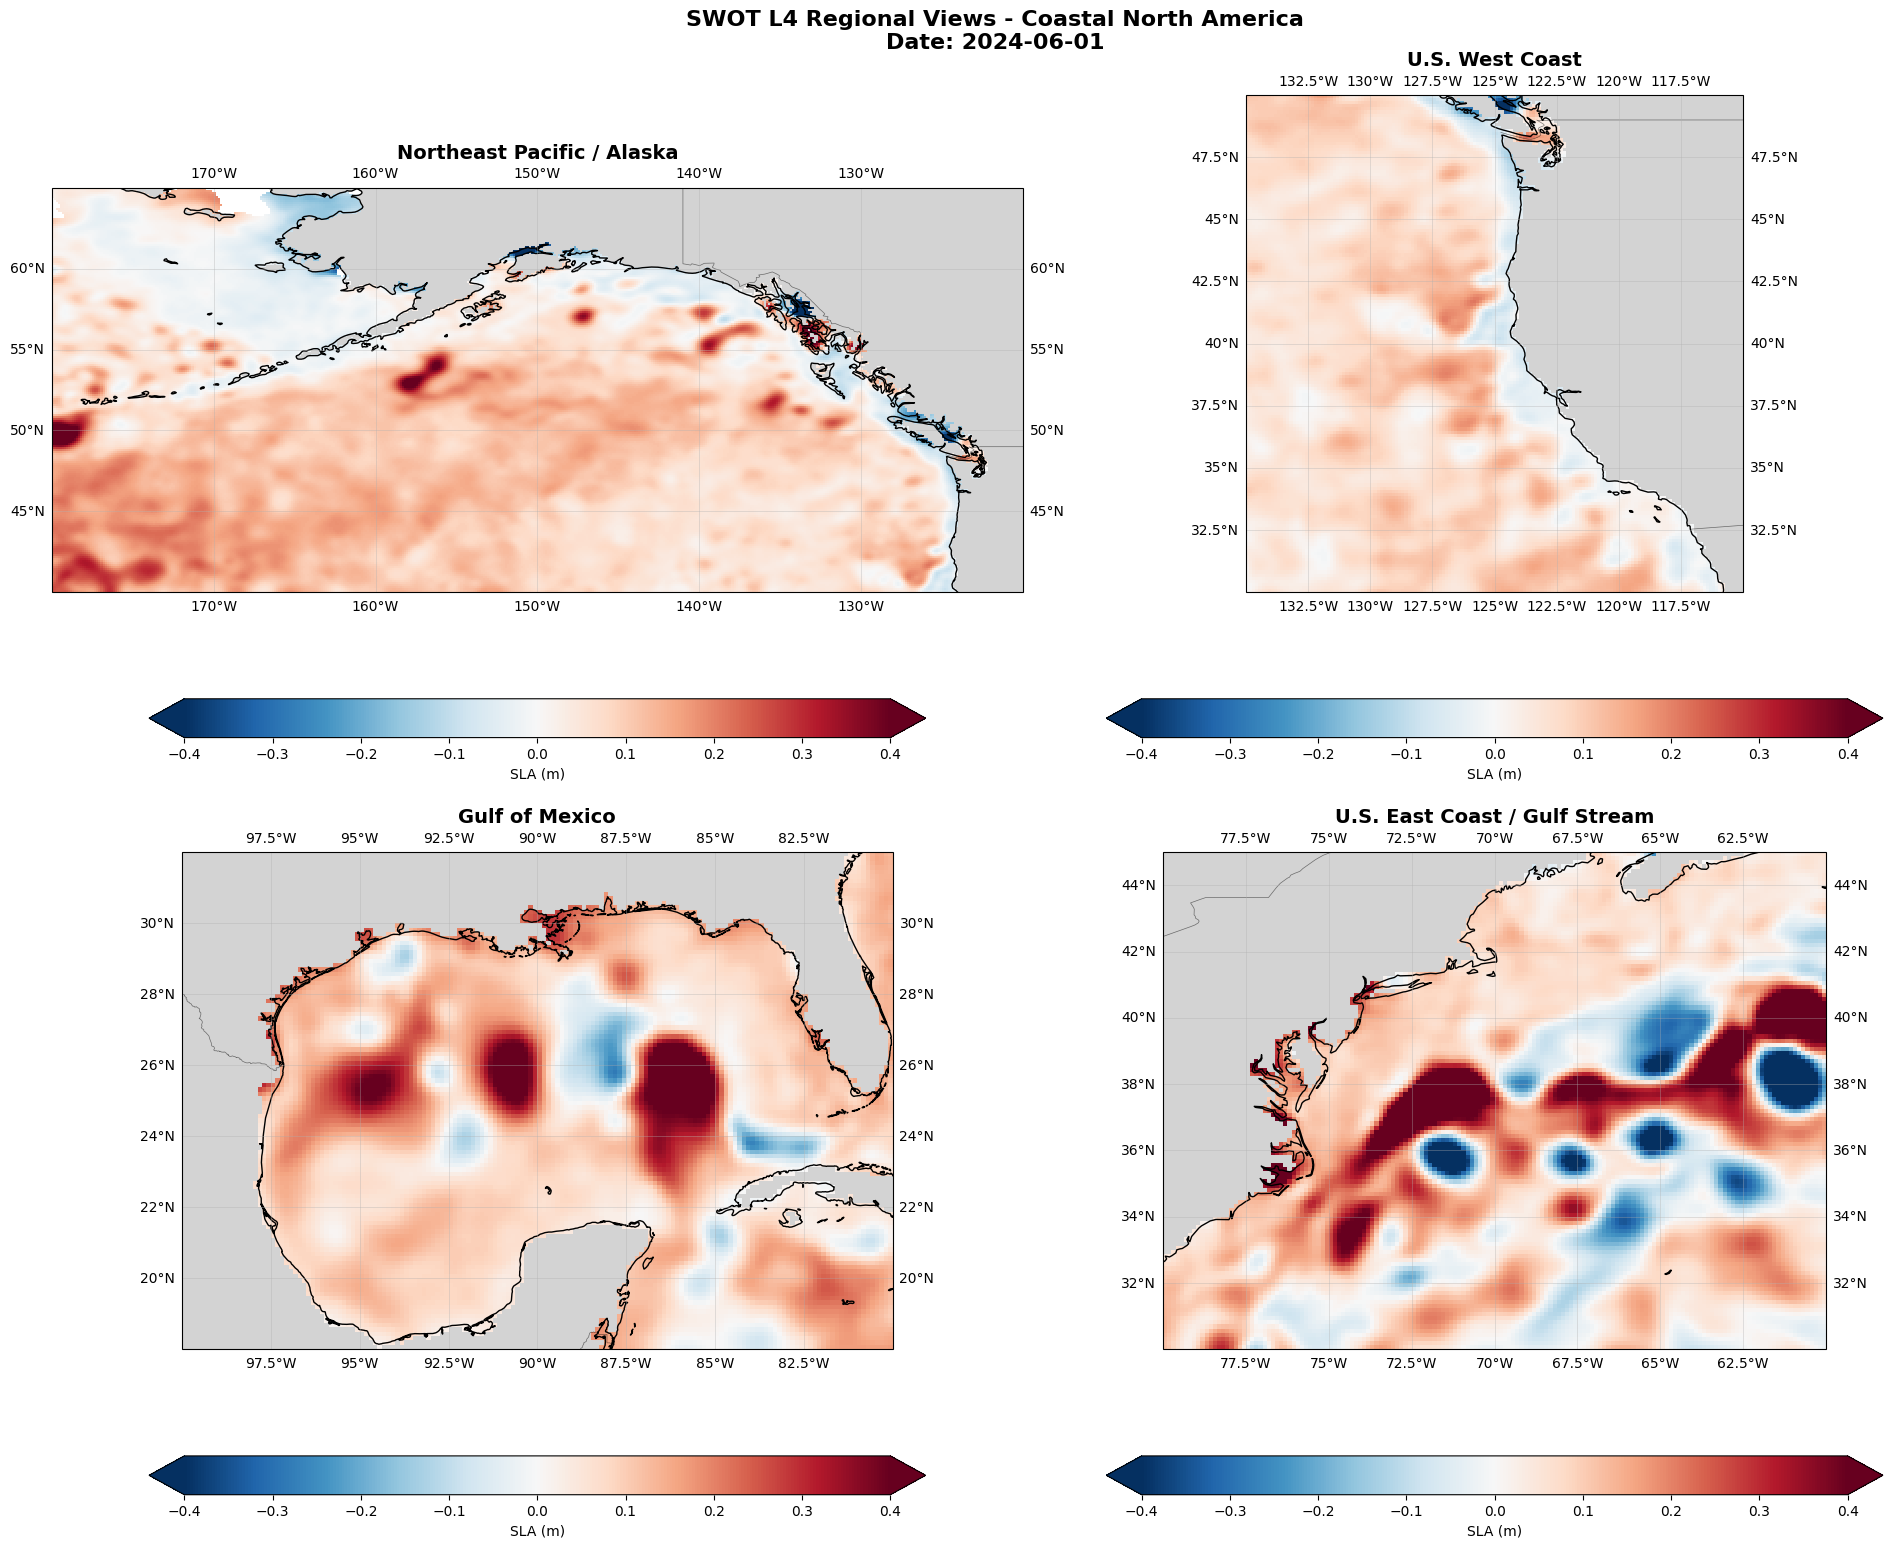

Figure saved as: swot_l4_north_america_regions_20240601.png


In [8]:
# Regional focus examples
fig, axes = plt.subplots(2, 2, figsize=(20, 16), 
                         subplot_kw={'projection': ccrs.PlateCarree()})
axes = axes.flatten()

# Define regions of interest
regions = [
    {'name': 'Northeast Pacific / Alaska', 'extent': [-180, -120, 40, 65]},
    {'name': 'U.S. West Coast', 'extent': [-135, -115, 30, 50]},
    {'name': 'Gulf of Mexico', 'extent': [-100, -80, 18, 32]},
    {'name': 'U.S. East Coast / Gulf Stream', 'extent': [-80, -60, 30, 45]}
]

for idx, (ax, region) in enumerate(zip(axes, regions)):
    # Plot SLA
    sla.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='RdBu_r',
             vmin=-0.4, vmax=0.4, add_colorbar=True,
             cbar_kwargs={'label': 'SLA (m)', 'shrink': 0.8, 'orientation': 'horizontal'})
    
    # Add features
    ax.add_feature(cfeature.LAND, facecolor='lightgray')
    ax.add_feature(cfeature.COASTLINE, linewidth=1)
    ax.add_feature(cfeature.BORDERS, linewidth=0.5, alpha=0.5)
    ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5)
    
    # Set extent and title
    ax.set_extent(region['extent'], crs=ccrs.PlateCarree())
    ax.set_title(f"{region['name']}", fontsize=14, fontweight='bold')

fig.suptitle(f'SWOT L4 Regional Views - Coastal North America\nDate: {time_str}',
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('swot_l4_north_america_regions_20240601.png', dpi=200, bbox_inches='tight')
plt.show()

print("Figure saved as: swot_l4_north_america_regions_20240601.png")

## 6. Extract Subset for Further Analysis

Example of how to extract a regional subset as netcdf for future work.

In [9]:
# Extract a regional subset (e.g., Northeast Pacific)
lon_min, lon_max = -180, -120
lat_min, lat_max = 40, 65

# Select region
regional_ds = ds.sel(
    longitude=slice(lon_min, lon_max),
    latitude=slice(lat_min, lat_max)
)

print(f"Regional subset extracted:")
print(f"  Longitude: {lon_min}° to {lon_max}°")
print(f"  Latitude: {lat_min}° to {lat_max}°")
print(f"  Shape: {regional_ds['sla'].isel(time=0).shape}")

# Save regional subset
output_file = 'swot_l4_northeast_pacific_20240601.nc'
regional_ds.to_netcdf(output_file)
print(f"\nRegional subset saved to: {output_file}")

Regional subset extracted:
  Longitude: -180° to -120°
  Latitude: 40° to 65°
  Shape: (200, 480)

Regional subset saved to: swot_l4_northeast_pacific_20240601.nc


In [10]:
# Close dataset
ds.close()
print("Dataset closed.")

Dataset closed.


## Summary

This notebook visualizes AVISO SWOT L4 gridded sea surface height data for **June 1, 2024**.


### Output Files:
- `swot_l4_global_mosaic_20240601.png` - Global sea level anomaly map
- `swot_l4_adt_geostrophic.png` - ADT and SLA map
- `swot_l4_north_america_regions_20240601.png` - Regional coastal views
- `swot_l4_northeast_pacific_20240601.nc` - Regional subset for further analysis